# Data Manipulation

## Reading and merging the data

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Merge data
movie_ratings = pd.merge(movies, ratings, on='movieId',how='left')
movie_ratings.to_csv("merged_movieratings.csv")

In [2]:
movie_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,4.0,1.113766e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,5.0,9.488858e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.5,1.442169e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,4.0,1.370810e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22.0,4.0,1.237623e+09
...,...,...,...,...,...,...
27757648,193878,Les tribulations d'une caissière (2011),Comedy,176871.0,2.0,1.537875e+09
27757649,193880,Her Name Was Mumu (2016),Drama,81710.0,2.0,1.537886e+09
27757650,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,33330.0,2.0,1.537891e+09
27757651,193886,Leal (2018),Action|Crime|Drama,206009.0,2.5,1.537918e+09


In [3]:
movie_ratings = pd.read_csv("merged_movieratings.csv")
movie_ratings.userId.nunique(dropna = True)

283228

In [4]:
movie_ratings.genres.nunique(dropna = True)

1643

### Finding number of movies per genre

In [5]:
# Load dataset
df = movie_ratings

# Count number of movies in each genre
genre_counts = df['genres'].value_counts().reset_index()
genre_counts.columns = ['genres', 'count']
genre_counts

,genres,count
0,Drama,1959903
1,Comedy,1713141
2,Comedy|Romance,1019373
3,Drama|Romance,901999
4,Comedy|Drama|Romance,802618
...,...,...
1638,Action|Adventure|Fantasy|Horror|Sci-Fi|Thriller,1
1639,Action|Adventure|Crime|Film-Noir|Romance,1
1640,Action|Adventure|Documentary|Drama|Thriller|We...,1
1641,Action|Fantasy|Sci-Fi|Thriller|Western,1


## Selecting top 100 genres and users

In [6]:
# Select top 100 genres with highest number of movies
top_100_genres = genre_counts.head(100)
# If you want just a list of the top 500 movie IDs
top_100_genres_name = top_100_genres['genres'].tolist()
# Displaying the top 1000 movie IDs
top_100_genres_name
# Filter dataframe based on selected genres
new_df = df[df['genres'].isin(top_100_genres_name)]
new_df

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,4.0,1.113766e+09
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,5.0,9.488858e+08
2,2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.5,1.442169e+09
3,3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,4.0,1.370810e+09
4,4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22.0,4.0,1.237623e+09
...,...,...,...,...,...,...,...
27757646,27757646,193874,Blondie's Big Moment (1947),Comedy,181577.0,5.0,1.537928e+09
27757648,27757648,193878,Les tribulations d'une caissière (2011),Comedy,176871.0,2.0,1.537875e+09
27757649,27757649,193880,Her Name Was Mumu (2016),Drama,81710.0,2.0,1.537886e+09
27757651,27757651,193886,Leal (2018),Action|Crime|Drama,206009.0,2.5,1.537918e+09


In [7]:
new_df.userId.nunique(dropna = True)

281455

In [8]:
new_df.genres.nunique(dropna = True)

100

In [9]:
new_df['movieId'].nunique()

40087

In [10]:
user_unique = new_df['userId'].unique()
# Select top 100 users with highest number of movies
# Group by 'user_id', count the ratings, and sort in descending order
top_users = new_df.groupby('userId')['rating'].count().sort_values(ascending=False).head(100)

# Get the list of top 100 user IDs
top_100_users = top_users.index.tolist()
# Filter dataframe based on selected genres
new_new_df = new_df[new_df['userId'].isin(top_100_users)]
new_new_df

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp
489,489,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2025.0,5.0,1.415555e+09
1156,1156,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4796.0,2.5,1.091426e+09
1880,1880,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7705.0,4.5,1.468952e+09
2720,2720,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11109.0,4.0,1.421501e+09
4791,4791,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19924.0,5.0,9.987044e+08
...,...,...,...,...,...,...,...
27757578,27757578,193759,Power of Grayskull: The Definitive History of ...,Documentary,111908.0,5.0,1.537611e+09
27757613,27757613,193813,"Love, Gilda (2018)",Documentary,275841.0,3.0,1.537672e+09
27757621,27757621,193825,The Police Are Blundering in the Dark (1975),Mystery|Thriller,73145.0,1.0,1.537735e+09
27757627,27757627,193839,Hot Thrills and Warm Chills (1967),Drama,269098.0,1.5,1.537755e+09


In [11]:
new_new_df['movieId'].nunique()

27508

In [12]:
new_new_df.userId.nunique(dropna = True)

100

In [13]:
new_new_df.genres.nunique(dropna = True)

100

In [78]:
new_new_df.to_csv("top_100_100_movielens.csv")

## Creating movie_id and user_id mappings

In [14]:
# Create mapping of movieId to row index in sparse matrix
movie_id_map = dict(zip(sorted(new_new_df['movieId'].unique()), range(len(new_new_df['movieId'].unique()))))

# Create mapping of userId to column index in sparse matrix
user_id_map = dict(zip(sorted(new_new_df['userId'].unique()), range(len(new_new_df['userId'].unique()))))

In [15]:
movie_id_map

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 10: 7,
 11: 8,
 12: 9,
 14: 10,
 16: 11,
 17: 12,
 18: 13,
 19: 14,
 21: 15,
 23: 16,
 24: 17,
 25: 18,
 26: 19,
 27: 20,
 28: 21,
 30: 22,
 31: 23,
 32: 24,
 34: 25,
 35: 26,
 36: 27,
 38: 28,
 39: 29,
 40: 30,
 41: 31,
 42: 32,
 43: 33,
 44: 34,
 46: 35,
 47: 36,
 49: 37,
 50: 38,
 51: 39,
 52: 40,
 53: 41,
 54: 42,
 55: 43,
 57: 44,
 58: 45,
 59: 46,
 60: 47,
 61: 48,
 62: 49,
 63: 50,
 64: 51,
 65: 52,
 66: 53,
 67: 54,
 68: 55,
 69: 56,
 72: 57,
 73: 58,
 74: 59,
 75: 60,
 76: 61,
 77: 62,
 78: 63,
 79: 64,
 80: 65,
 82: 66,
 83: 67,
 84: 68,
 85: 69,
 86: 70,
 87: 71,
 88: 72,
 89: 73,
 90: 74,
 92: 75,
 94: 76,
 95: 77,
 96: 78,
 97: 79,
 98: 80,
 99: 81,
 100: 82,
 102: 83,
 103: 84,
 104: 85,
 105: 86,
 106: 87,
 108: 88,
 110: 89,
 111: 90,
 112: 91,
 113: 92,
 114: 93,
 115: 94,
 116: 95,
 117: 96,
 118: 97,
 119: 98,
 121: 99,
 122: 100,
 124: 101,
 125: 102,
 126: 103,
 127: 104,
 128: 105,
 129: 106,
 130: 107,
 131: 108,


In [79]:
import json
import numpy as np

# Now save this converted dictionary as JSON
with open('user_id_map_movielens.txt', 'w') as file:
    json.dump(user_id_map, file)

## Finding user wise movie vectors

In [16]:
#Function to find movie id vectors by user id
def movie_id_vectors(df1):
    temp = [0 for i in range(new_new_df['movieId'].nunique())]
    df1 = df1.reset_index()
    for r in range(len(df1)):
        temp[movie_id_map[df1.iloc[r]['movieId']]]= df1.iloc[r]['rating']
    return temp

In [17]:
gbtest = new_new_df.groupby("userId")
ab = pd.DataFrame(gbtest.apply(movie_id_vectors)).reset_index()
ab

,userId,0
0,2025.0,"[5.0, 2.0, 2.5, 0, 3.0, 4.5, 3.5, 4.0, 0, 1.0,..."
1,4796.0,"[2.5, 0, 0, 3.5, 0, 3.5, 3.0, 3.0, 3.0, 0, 3.0..."
2,7705.0,"[4.5, 3.0, 0, 0, 0, 4.5, 0, 3.0, 3.0, 0, 0, 4...."
3,11109.0,"[4.0, 3.5, 3.0, 0, 3.5, 5.0, 4.0, 3.5, 2.0, 2...."
4,14320.0,"[0, 0, 1.5, 3.0, 2.5, 0.5, 3.5, 0, 4.0, 0, 2.5..."
...,...,...
95,271383.0,"[4.0, 3.5, 0, 0, 0, 4.5, 2.5, 3.5, 0, 2.5, 0, ..."
96,273842.0,"[4.0, 4.0, 3.0, 0, 4.5, 3.0, 0, 3.5, 4.5, 2.5,..."
97,275204.0,"[3.0, 3.0, 3.0, 3.0, 0, 0, 1.0, 3.0, 3.0, 0, 3..."
98,275841.0,"[4.0, 2.0, 2.0, 0, 0, 5.0, 3.0, 3.0, 4.0, 1.0,..."


## Calculating Cosine similarity between each pair of users

In [18]:
import numpy as np
from numpy.linalg import norm

In [19]:
mat = np.empty((len(ab),len(ab)))
mat

array([[1.10547644e-311, 1.10547787e-311, 1.10531376e-311, ...,
        1.10531376e-311, 1.10531376e-311, 1.10531376e-311],
       [1.10531376e-311, 1.10531376e-311, 1.10531376e-311, ...,
        1.10531376e-311, 1.10531376e-311, 1.10531376e-311],
       [1.10531376e-311, 1.10531376e-311, 1.10531376e-311, ...,
        1.10531376e-311, 1.10531376e-311, 1.10531376e-311],
       ...,
       [1.10531376e-311, 1.10531376e-311, 1.10531376e-311, ...,
        1.10531376e-311, 1.10531376e-311, 1.10531376e-311],
       [1.10531376e-311, 1.10531376e-311, 1.10531376e-311, ...,
        1.10531376e-311, 1.10531376e-311, 1.10531376e-311],
       [1.10531376e-311, 1.10531376e-311, 1.10531376e-311, ...,
        1.10531376e-311, 1.10531376e-311, 1.10531376e-311]])

In [20]:
def normmmm(vec):
        B = np.array(list(vec))
        return norm(B)

normb = ab[0].apply(normmmm)
normb

0     192.353191
1     203.008005
2     193.357182
3     170.566702
4     140.146352
         ...    
95    186.462463
96    156.792857
97    188.878929
98    166.436925
99    133.530895
Name: 0, Length: 100, dtype: float64

In [21]:
for i in range(len(ab)):
    A = np.array(list(ab.iloc[i][0]))
    norma = normb[i]
    for j in range(i,len(ab)):
        B = np.array(list(ab.iloc[j][0]))
        mat[i][j] = np.dot(A,B)/(norma*normb[j])
        mat[j][i] = mat[i][j]
mat

array([[1.        , 0.4288368 , 0.3955059 , ..., 0.43575865, 0.43297334,
        0.4332474 ],
       [0.4288368 , 1.        , 0.40938214, ..., 0.4438642 , 0.48587476,
        0.43594398],
       [0.3955059 , 0.40938214, 1.        , ..., 0.35797117, 0.47850841,
        0.404806  ],
       ...,
       [0.43575865, 0.4438642 , 0.35797117, ..., 1.        , 0.31077799,
        0.5103252 ],
       [0.43297334, 0.48587476, 0.47850841, ..., 0.31077799, 1.        ,
        0.38052648],
       [0.4332474 , 0.43594398, 0.404806  , ..., 0.5103252 , 0.38052648,
        1.        ]])

In [22]:
mat.shape

(100, 100)

In [23]:
filename = 'array_movielens.csv'

# Save the array to a CSV file
np.savetxt(filename, mat, delimiter=',')

## Creating genre mapping

In [24]:
# Create mapping of genres
genre_map = dict(zip(sorted(new_new_df['genres'].unique()), range(len(new_new_df['genres'].unique()))))

In [27]:
import json
with open('genre_map_movielens.txt', 'w') as file:
    json.dump(genre_map, file)

## Finding SVNS list for each user

In [25]:
#function to create SVNS
def find_svns(df):
    temp = [ [0,0,0] for i in range(new_new_df['genres'].nunique())]
    df = df.reset_index()
    for g in df['genres'].unique():
        #print(g)
        rat = df[df['genres'] == g]
        gg = len(rat[rat["rating"]>=4])
        n = len(rat[rat["rating"]>2])-gg
        b = len(rat[rat["rating"]<=2])

        temp[genre_map[g]]=[gg,n,b]
    return temp        

In [26]:
u_g_sv = pd.DataFrame(gbtest.apply(find_svns)).reset_index()
u_g_sv

,userId,0
0,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [..."
1,4796.0,"[[0, 2, 0], [0, 1, 1], [0, 1, 0], [0, 0, 2], [..."
2,7705.0,"[[6, 9, 8], [3, 7, 4], [1, 2, 2], [0, 3, 4], [..."
3,11109.0,"[[6, 2, 6], [1, 8, 3], [2, 1, 1], [3, 2, 2], [..."
4,14320.0,"[[0, 0, 10], [0, 1, 3], [0, 1, 1], [0, 0, 1], ..."
...,...,...
95,271383.0,"[[8, 3, 1], [1, 9, 0], [0, 3, 0], [2, 4, 0], [..."
96,273842.0,"[[2, 6, 2], [4, 4, 1], [2, 1, 1], [2, 2, 2], [..."
97,275204.0,"[[5, 5, 4], [1, 4, 0], [1, 0, 1], [1, 2, 1], [..."
98,275841.0,"[[2, 3, 5], [0, 2, 3], [0, 2, 2], [0, 2, 3], [..."


In [28]:
# Mapping every users SVNS list to every other user
test_crossjoin = u_g_sv
test_crossjoin['key'] = 1
result = pd.merge(test_crossjoin, test_crossjoin, on ='key').drop(["key"],axis=1)
result

,userId_x,0_x,userId_y,0_y
0,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [..."
1,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",4796.0,"[[0, 2, 0], [0, 1, 1], [0, 1, 0], [0, 0, 2], [..."
2,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",7705.0,"[[6, 9, 8], [3, 7, 4], [1, 2, 2], [0, 3, 4], [..."
3,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",11109.0,"[[6, 2, 6], [1, 8, 3], [2, 1, 1], [3, 2, 2], [..."
4,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",14320.0,"[[0, 0, 10], [0, 1, 3], [0, 1, 1], [0, 0, 1], ..."
...,...,...,...,...
9995,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",271383.0,"[[8, 3, 1], [1, 9, 0], [0, 3, 0], [2, 4, 0], [..."
9996,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",273842.0,"[[2, 6, 2], [4, 4, 1], [2, 1, 1], [2, 2, 2], [..."
9997,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",275204.0,"[[5, 5, 4], [1, 4, 0], [1, 0, 1], [1, 2, 1], [..."
9998,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",275841.0,"[[2, 3, 5], [0, 2, 3], [0, 2, 2], [0, 2, 3], [..."


In [29]:
mat

array([[1.        , 0.4288368 , 0.3955059 , ..., 0.43575865, 0.43297334,
        0.4332474 ],
       [0.4288368 , 1.        , 0.40938214, ..., 0.4438642 , 0.48587476,
        0.43594398],
       [0.3955059 , 0.40938214, 1.        , ..., 0.35797117, 0.47850841,
        0.404806  ],
       ...,
       [0.43575865, 0.4438642 , 0.35797117, ..., 1.        , 0.31077799,
        0.5103252 ],
       [0.43297334, 0.48587476, 0.47850841, ..., 0.31077799, 1.        ,
        0.38052648],
       [0.4332474 , 0.43594398, 0.404806  , ..., 0.5103252 , 0.38052648,
        1.        ]])

## Mapping each pair of users with their corresponding genre wise SVNS list and their cosine similarity

In [30]:
def mapping_userid_xandy(row):
    return mat[user_id_map[row['userId_x']],user_id_map[row['userId_y']]]

In [31]:
result["cosin"] = result.apply(mapping_userid_xandy,axis = 1)
result

,userId_x,0_x,userId_y,0_y,cosin
0,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",1.000000
1,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",4796.0,"[[0, 2, 0], [0, 1, 1], [0, 1, 0], [0, 0, 2], [...",0.428837
2,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",7705.0,"[[6, 9, 8], [3, 7, 4], [1, 2, 2], [0, 3, 4], [...",0.395506
3,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",11109.0,"[[6, 2, 6], [1, 8, 3], [2, 1, 1], [3, 2, 2], [...",0.330084
4,2025.0,"[[2, 4, 2], [2, 1, 1], [0, 1, 1], [0, 2, 0], [...",14320.0,"[[0, 0, 10], [0, 1, 3], [0, 1, 1], [0, 0, 1], ...",0.372854
...,...,...,...,...,...
9995,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",271383.0,"[[8, 3, 1], [1, 9, 0], [0, 3, 0], [2, 4, 0], [...",0.432586
9996,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",273842.0,"[[2, 6, 2], [4, 4, 1], [2, 1, 1], [2, 2, 2], [...",0.225513
9997,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",275204.0,"[[5, 5, 4], [1, 4, 0], [1, 0, 1], [1, 2, 1], [...",0.510325
9998,281790.0,"[[0, 2, 3], [0, 0, 2], [0, 1, 2], [0, 0, 2], [...",275841.0,"[[2, 3, 5], [0, 2, 3], [0, 2, 2], [0, 2, 3], [...",0.380526


In [32]:
import scipy

In [33]:
len(result['0_x'][0])

100

In [34]:
#Function to find genre wise cosine similarity
def genre_wise_cosinesimilarity(row):
    temp = [ 0 for i in range(len(result['0_x'][0]))]
    for j in range(0,len(row[1])):
        temp[j] = (scipy.spatial.distance.cosine(row[1][j],row[3][j]))
    return temp

In [35]:
result1 = pd.DataFrame()
result1['User1'] = result['userId_x']
result1['User2'] = result['userId_y']
result1['genre_based_cosinesimilarity'] = result.apply(genre_wise_cosinesimilarity,axis=1)
result1["Cosine_between_user"] = result['cosin']
result1

c:\Python310\lib\site-packages\scipy\spatial\distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


,User1,User2,genre_based_cosinesimilarity,Cosine_between_user
0,2025.0,2025.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
1,2025.0,4796.0,"[0.18350341907227397, 0.42264973081037427, 0.2...",0.428837
2,2025.0,7705.0,"[0.028964593544952955, 0.19321570361037588, 0....",0.395506
3,2025.0,11109.0,"[0.2507313507346449, 0.38304730276087573, 0.42...",0.330084
4,2025.0,14320.0,"[0.591751709536137, 0.4836022205056778, 0, 1.0...",0.372854
...,...,...,...,...
9995,281790.0,271383.0,"[0.7098283539013774, 1.0, 0.5527864045000421, ...",0.432586
9996,281790.0,273842.0,"[0.24738219099361825, 0.8259223440443022, 0.45...",0.225513
9997,281790.0,275204.0,"[0.2489323838011892, 1.0, 0.36754446796632423,...",0.510325
9998,281790.0,275841.0,"[0.0551653316017201, 0.16794970566215617, 0.05...",0.380526


In [36]:
# splitting each element of the list as a new feature

r_test = pd.DataFrame(result1['genre_based_cosinesimilarity'])
r_test = pd.DataFrame(r_test.genre_based_cosinesimilarity.tolist(), index= r_test.index)
r_test["Cosine_between_user"] = result['cosin']
r_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Cosine_between_user
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.183503,0.422650,0.292893,1.000000,0.292893,0.132278,0.500770,0.051317,0.076923,0.316237,...,0.543697,0.464017,0.331144,0.573599,0.309524,0.183283,0.552786,0.767155,0.305531,0.428837
2,0.028965,0.193216,0.057191,0.400000,0.500000,0.176471,0.043740,0.701858,0.273040,0.072787,...,0.071461,0.255622,0.015575,0.076130,0.111942,0.101406,0.591752,0.388407,0.009675,0.395506
3,0.250731,0.383047,0.422650,0.514929,0.292893,0.155599,0.016854,0.858579,0.198766,0.050329,...,0.106251,0.494705,0.005900,0.056283,0.296769,0.155229,0.105573,0.670707,0.317817,0.330084
4,0.591752,0.483602,0.000000,1.000000,0.500000,0.000000,0.731672,0.000000,0.167950,0.544158,...,0.520651,0.732739,0.223276,0.352613,0.812330,0.507634,1.000000,0.784334,0.346996,0.372854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.709828,1.000000,0.552786,1.000000,0.292893,0.167950,0.442952,1.000000,0.359791,0.716963,...,0.638906,0.143235,0.014657,0.078314,0.365167,0.426113,1.000000,0.033355,0.162756,0.432586
9996,0.247382,0.825922,0.452277,0.422650,0.292893,0.311753,0.078319,1.000000,0.060664,0.167185,...,0.250559,0.101289,0.355063,0.175310,0.206514,0.258838,0.683772,0.063445,0.186959,0.225513
9997,0.248932,1.000000,0.367544,0.591752,1.000000,0.292893,0.350349,0.000000,0.326367,0.720000,...,0.448499,0.264527,0.912630,0.314006,0.171150,0.157424,0.105573,0.030021,0.109043,0.510325
9998,0.055165,0.167950,0.051317,0.167950,0.000000,0.292893,0.130036,1.000000,0.026974,0.406704,...,0.132958,0.020827,0.213666,0.029857,0.118215,0.000432,0.000000,0.079398,0.071663,0.380526


In [37]:
r_test.to_csv("training_data_movielens.csv")

# Training Regression Models 

In [38]:
train_movielens = pd.read_csv("training_data_movielens.csv")

In [39]:
from pycaret.regression import *
exp_reg101 = setup(data = train_movielens, target = 'Cosine_between_user',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Cosine_between_user
2,Target type,Regression
3,Original data shape,"(10000, 102)"
4,Transformed data shape,"(10000, 102)"
5,Transformed train set shape,"(7000, 102)"
6,Transformed test set shape,"(3000, 102)"
7,Numeric features,101
8,Preprocess,True
9,Imputation type,simple


In [40]:
best_movielens = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0189,0.0017,0.0416,0.8723,0.0294,0.0497,1.3490
xgboost,Extreme Gradient Boosting,0.0272,0.0020,0.0448,0.8521,0.0316,0.0707,1.2510
rf,Random Forest Regressor,0.0307,0.0022,0.0471,0.8372,0.0333,0.0821,1.3410
lightgbm,Light Gradient Boosting Machine,0.0364,0.0026,0.0509,0.8100,0.0359,0.0962,1.2420
dt,Decision Tree Regressor,0.0266,0.0038,0.0616,0.7200,0.0435,0.0688,1.2540
gbr,Gradient Boosting Regressor,0.0531,0.0047,0.0685,0.6559,0.0487,0.1439,1.2860
ada,AdaBoost Regressor,0.0688,0.0072,0.0851,0.4714,0.0610,0.1953,1.3120
ridge,Ridge Regression,0.0717,0.0094,0.0970,0.3147,0.0660,0.1885,1.2890
lr,Linear Regression,0.0717,0.0094,0.0970,0.3145,0.0661,0.1885,2.0770
br,Bayesian Ridge,0.0717,0.0094,0.0971,0.3135,0.0661,0.1888,1.3590


## Tuning and plotting the top 5 models

In [41]:
XGBOOST = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0270,0.0018,0.0429,0.8400,0.0305,0.0712
1,0.0259,0.0016,0.0396,0.8932,0.0283,0.0687
2,0.0272,0.0020,0.0446,0.8387,0.0312,0.0693
3,0.0259,0.0023,0.0482,0.8211,0.0332,0.0634
4,0.0286,0.0025,0.0500,0.8264,0.0345,0.0734
5,0.0268,0.0018,0.0421,0.8914,0.0304,0.0738
6,0.0246,0.0017,0.0408,0.8780,0.0289,0.0639
7,0.0283,0.0022,0.0464,0.8520,0.0331,0.0755
8,0.0275,0.0020,0.0448,0.8678,0.0313,0.0711


In [42]:
tuned_XGBOOST, tuner_xgboost = tune_model(XGBOOST, return_tuner=True,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0306,0.0020,0.0448,0.8251,0.0320,0.0817
1,0.0294,0.0019,0.0433,0.8726,0.0309,0.0788
2,0.0313,0.0023,0.0477,0.8154,0.0336,0.0818
3,0.0309,0.0024,0.0488,0.8168,0.0337,0.0774
4,0.0324,0.0026,0.0507,0.8217,0.0351,0.0844
5,0.0306,0.0020,0.0446,0.8782,0.0319,0.0830
6,0.0302,0.0020,0.0450,0.8517,0.0318,0.0805
7,0.0322,0.0022,0.0466,0.8505,0.0332,0.0864
8,0.0317,0.0023,0.0475,0.8515,0.0333,0.0829


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [43]:
print(tuner_xgboost)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [44]:
with open('tuner_xgboost_movielens.txt', 'w') as file:
    file.write(str(tuner_xgboost))

In [45]:
tuned_XGBOOST

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

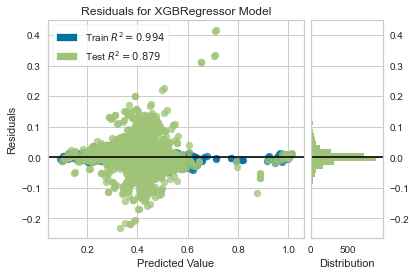

In [46]:
plot_model(tuned_XGBOOST)

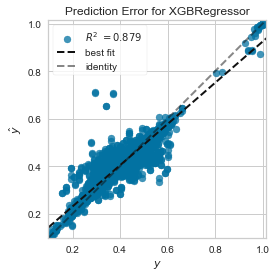

In [47]:
plot_model(tuned_XGBOOST, plot='error')

In [48]:
randomforest = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0315,0.0022,0.0464,0.8130,0.0331,0.0856
1,0.0288,0.0019,0.0431,0.8732,0.0310,0.0781
2,0.0307,0.0023,0.0477,0.8152,0.0337,0.0809
3,0.0305,0.0024,0.0491,0.8139,0.0341,0.0779
4,0.0330,0.0028,0.0531,0.8039,0.0369,0.0871
5,0.0290,0.0020,0.0447,0.8773,0.0321,0.0807
6,0.0281,0.0019,0.0430,0.8641,0.0307,0.0768
7,0.0322,0.0022,0.0471,0.8472,0.0338,0.0876
8,0.0317,0.0024,0.0488,0.8434,0.0342,0.0844


In [49]:
tuned_randomforest, tuner_rf = tune_model(randomforest, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0697,0.0076,0.0872,0.3383,0.0626,0.1968
1,0.0655,0.0068,0.0827,0.5346,0.0594,0.1841
2,0.0658,0.0069,0.0830,0.4413,0.0594,0.1831
3,0.0678,0.0074,0.0858,0.4327,0.0607,0.1827
4,0.0694,0.0076,0.0872,0.4715,0.0624,0.1989
5,0.0683,0.0075,0.0867,0.5392,0.0623,0.1987
6,0.0674,0.0074,0.0860,0.4579,0.0624,0.2039
7,0.0695,0.0076,0.0872,0.4766,0.0627,0.1998
8,0.0705,0.0080,0.0895,0.4737,0.0641,0.2039


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [50]:
print(tuner_rf)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [51]:
with open('tuner_random_forest_movielens.txt', 'w') as file:
    file.write(str(tuner_rf))

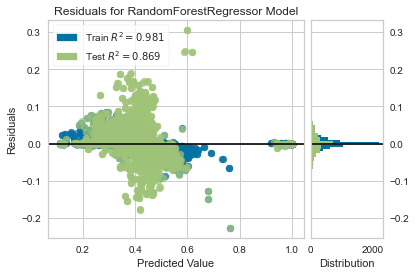

In [52]:
plot_model(tuned_randomforest)

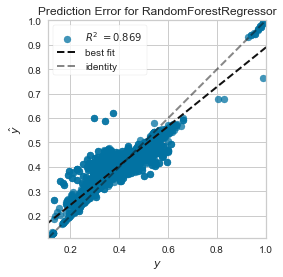

In [53]:
plot_model(tuned_randomforest, plot='error')

In [54]:
LightgradientBoost = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0372,0.0026,0.0506,0.7773,0.0360,0.0999
1,0.0333,0.0021,0.0460,0.8559,0.0328,0.0888
2,0.0368,0.0027,0.0515,0.7850,0.0364,0.0966
3,0.0360,0.0028,0.0528,0.7848,0.0365,0.0904
4,0.0380,0.0031,0.0554,0.7867,0.0385,0.0994
5,0.0347,0.0023,0.0482,0.8573,0.0345,0.0944
6,0.0354,0.0025,0.0500,0.8167,0.0353,0.0956
7,0.0366,0.0024,0.0489,0.8357,0.0348,0.0976
8,0.0378,0.0028,0.0533,0.8134,0.0374,0.1002


In [55]:
tuned_LightgradientBoost, tuner_lgbm = tune_model(LightgradientBoost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0660,0.0071,0.0842,0.3839,0.0602,0.1848
1,0.0602,0.0058,0.0759,0.6079,0.0544,0.1670
2,0.0637,0.0065,0.0808,0.4705,0.0576,0.1748
3,0.0644,0.0070,0.0837,0.4596,0.0587,0.1705
4,0.0650,0.0069,0.0829,0.5229,0.0588,0.1809
5,0.0608,0.0062,0.0791,0.6167,0.0565,0.1729
6,0.0632,0.0064,0.0799,0.5321,0.0577,0.1855
7,0.0653,0.0067,0.0816,0.5416,0.0585,0.1837
8,0.0647,0.0068,0.0825,0.5522,0.0588,0.1813


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [56]:
with open('tuner_light_gradient_boost_movielens.txt', 'w') as file:
    file.write(str(tuner_lgbm))

In [57]:
tuned_LightgradientBoost

LGBMRegressor(random_state=123)

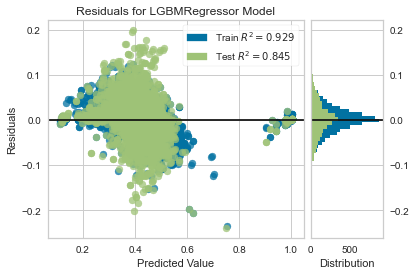

In [58]:
plot_model(tuned_LightgradientBoost)

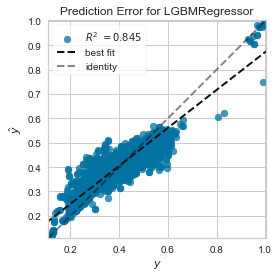

In [59]:
plot_model(tuned_LightgradientBoost, plot='error')

In [60]:
extratrees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0187,0.0017,0.0407,0.8562,0.0290,0.0504
1,0.0183,0.0015,0.0392,0.8953,0.0282,0.0506
2,0.0189,0.0018,0.0428,0.8515,0.0300,0.0490
3,0.0183,0.0019,0.0433,0.8556,0.0298,0.0457
4,0.0217,0.0023,0.0485,0.8369,0.0336,0.0566
5,0.0179,0.0015,0.0393,0.9054,0.0283,0.0501
6,0.0151,0.0013,0.0356,0.9073,0.0250,0.0387
7,0.0210,0.0019,0.0431,0.8725,0.0307,0.0564
8,0.0184,0.0017,0.0408,0.8903,0.0286,0.0478


In [61]:
tuned_extratrees, tuner_et = tune_model(extratrees, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0742,0.0086,0.0928,0.2518,0.0667,0.2113
1,0.0713,0.0080,0.0896,0.4527,0.0645,0.2024
2,0.0698,0.0078,0.0881,0.3705,0.0630,0.1954
3,0.0724,0.0083,0.0913,0.3572,0.0647,0.1965
4,0.0742,0.0087,0.0933,0.3956,0.0668,0.2151
5,0.0745,0.0089,0.0944,0.4536,0.0677,0.2178
6,0.0731,0.0087,0.0933,0.3612,0.0679,0.2253
7,0.0744,0.0088,0.0936,0.3974,0.0672,0.2147
8,0.0760,0.0092,0.0957,0.3979,0.0688,0.2231


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
with open('tuner_extra_trees_movielens.txt', 'w') as file:
    file.write(str(tuner_et))

In [63]:
tuned_extratrees

ExtraTreesRegressor(n_jobs=-1, random_state=123)

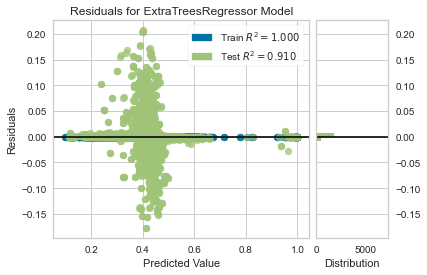

In [64]:
plot_model(tuned_extratrees)

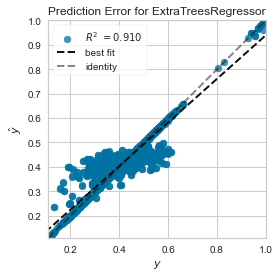

In [65]:
plot_model(tuned_extratrees, plot='error')

In [66]:
decisiontree = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0266,0.0037,0.0608,0.6784,0.0434,0.0690
1,0.0239,0.0032,0.0562,0.7846,0.0398,0.0626
2,0.0265,0.0040,0.0631,0.6769,0.0443,0.0653
3,0.0270,0.0038,0.0614,0.7095,0.0430,0.0667
4,0.0321,0.0053,0.0728,0.6324,0.0513,0.0827
5,0.0226,0.0028,0.0531,0.8268,0.0379,0.0595
6,0.0225,0.0032,0.0569,0.7627,0.0398,0.0610
7,0.0318,0.0045,0.0673,0.6885,0.0476,0.0839
8,0.0265,0.0040,0.0635,0.7351,0.0446,0.0676


In [67]:
tuned_decisiontree, tuner_dt = tune_model(decisiontree, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0574,0.0059,0.0769,0.4856,0.0547,0.1521
1,0.0509,0.0045,0.0674,0.6906,0.0478,0.1321
2,0.0561,0.0057,0.0752,0.5416,0.0533,0.1481
3,0.0518,0.0050,0.0706,0.6161,0.0495,0.1314
4,0.0577,0.0064,0.0800,0.5555,0.0566,0.1550
5,0.0510,0.0048,0.0692,0.7062,0.0492,0.1359
6,0.0521,0.0054,0.0732,0.6068,0.0520,0.1389
7,0.0577,0.0062,0.0785,0.5761,0.0562,0.1556
8,0.0560,0.0058,0.0761,0.6196,0.0538,0.1483


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [68]:
with open('tuner_decision_tree_movielens.txt', 'w') as file:
    file.write(str(tuner_dt))

In [69]:
tuned_decisiontree

DecisionTreeRegressor(random_state=123)

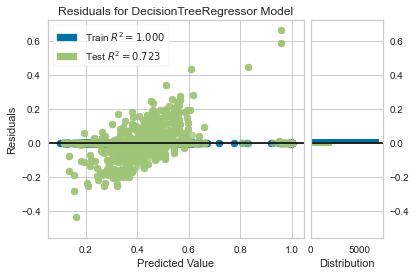

In [70]:
plot_model(tuned_decisiontree)

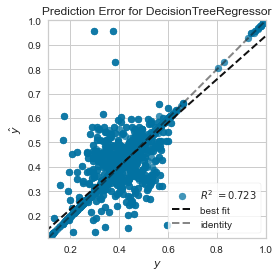

In [71]:
plot_model(tuned_decisiontree, plot='error')

In [72]:
gradientboost = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0544,0.0050,0.0704,0.5694,0.0502,0.1487
1,0.0502,0.0041,0.0643,0.7186,0.0459,0.1360
2,0.0530,0.0047,0.0684,0.6206,0.0487,0.1427
3,0.0534,0.0047,0.0689,0.6343,0.0482,0.1388
4,0.0547,0.0052,0.0722,0.6378,0.0508,0.1480
5,0.0508,0.0044,0.0663,0.7303,0.0473,0.1405
6,0.0514,0.0044,0.0663,0.6773,0.0475,0.1445
7,0.0537,0.0046,0.0679,0.6829,0.0485,0.1478
8,0.0555,0.0052,0.0721,0.6584,0.0511,0.1516


In [73]:
tuned_gradientboost, tuner_gbr = tune_model(gradientboost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0295,0.0021,0.0455,0.8202,0.0322,0.0768
1,0.0287,0.0020,0.0450,0.8622,0.0321,0.0770
2,0.0312,0.0025,0.0499,0.7984,0.0351,0.0787
3,0.0300,0.0026,0.0511,0.7984,0.0355,0.0742
4,0.0308,0.0028,0.0529,0.8059,0.0366,0.0803
5,0.0295,0.0021,0.0459,0.8706,0.0330,0.0803
6,0.0292,0.0021,0.0456,0.8473,0.0323,0.0759
7,0.0307,0.0024,0.0488,0.8364,0.0347,0.0804
8,0.0281,0.0019,0.0438,0.8741,0.0307,0.0727


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [74]:
with open('tuner_gradient_boost_movielens.txt', 'w') as file:
    file.write(str(tuner_gbr))

In [75]:
tuned_gradientboost

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, max_features=1.0,
                          min_impurity_decrease=0.0005, min_samples_leaf=3,
                          min_samples_split=7, n_estimators=160,
                          random_state=123, subsample=0.45)

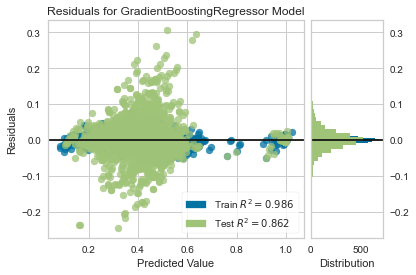

In [76]:
plot_model(tuned_gradientboost)

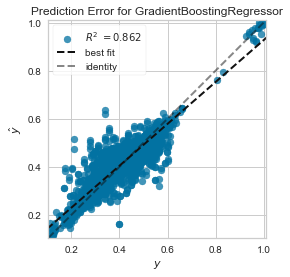

In [77]:
plot_model(tuned_gradientboost, plot='error')